In [ ]:
!pip install vision_transformer_pytorch

In [ ]:
!pip install vit-pytorch
!pip install graphviz
!pip install torchview
!pip install torchviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=dadd2b5592d4ea293ff7355f9a636f23a4723628c0a6e3c28f7e154630b820c5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import numpy as np

import torch
from torch import nn
from torchvision import transforms
import cv2


from PIL import Image
import matplotlib.pyplot as plt
from torchviz import make_dot, make_dot_from_trace


# Architecture Map

## Pytorch

In [ ]:
# from vit_pytorch import SimpleViT
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        return x

x = torch.randn(1, 3, 256, 256)
y = SimpleCNN()(x)

In [ ]:
make_dot(y.mean(), params=dict(SimpleCNN().named_parameters()),
         show_attrs=True, show_saved=True).render("ViT_torchviz", format="png")

'ViT_torchviz.png'

## Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

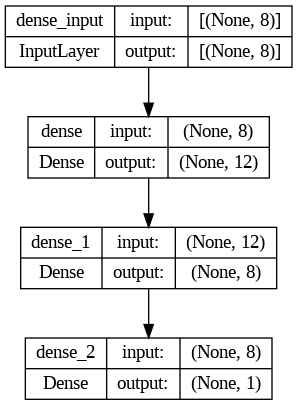

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Activation Heatmaps

In [ ]:
!pip install -e git+https://github.com/frgfm/torch-cam.git#egg=torchcam

Obtaining torchcam from git+https://github.com/frgfm/torch-cam.git#egg=torchcam
  Cloning https://github.com/frgfm/torch-cam.git to ./src/torchcam
  Running command git clone --filter=blob:none --quiet https://github.com/frgfm/torch-cam.git /content/src/torchcam
  Resolved https://github.com/frgfm/torch-cam.git to commit 0d7a579e3d4a164a0e7f367044f4db355af38a55
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for torchcam (pyproject.toml) ... done
  Created wheel for torchcam: filename=torchcam-0.4.0.dev0-0.editable-py3-none-any.whl size=16298 sha256=183bc9799e0451db848145096f7117c86227de6b5bdf9b2912ad2e1adcadf8b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3kk29q9v/wheels/4d/2c/b0/2d3e3994eddb5a04844c88f547a1aeddfa11c5433db609de60
Successfully built torchcam


In [ ]:
!wget https://www.woopets.fr/assets/races/000/066/big-portrait/border-collie.jpg
img_path = "border-collie.jpg"

--2023-10-09 06:34:20--  https://www.woopets.fr/assets/races/000/066/big-portrait/border-collie.jpg
Resolving www.woopets.fr (www.woopets.fr)... 104.26.13.50, 104.26.12.50, 172.67.73.8, ...
Connecting to www.woopets.fr (www.woopets.fr)|104.26.13.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273044 (267K) [image/jpeg]
Saving to: ‘border-collie.jpg.1’

border-collie.jpg.1 100%[===================>] 266.64K  --.-KB/s    in 0.04s   

2023-10-09 06:34:20 (5.92 MB/s) - ‘border-collie.jpg.1’ saved [273044/273044]



In [ ]:
img = cv2.imread(img_path)
img = img.reshape(img.shape[-1], img.shape[0], img.shape[1])
img = torch.tensor(img)
img.shape

torch.Size([3, 533, 395])

In [ ]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp
from torchcam.utils import overlay_mask

model = resnet18(pretrained=True).eval()
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

cam_extractor = SmoothGradCAMpp(model)
out = model(input_tensor.unsqueeze(0))

cams = cam_extractor(out.squeeze(0).argmax().item(), out)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 206MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomRes

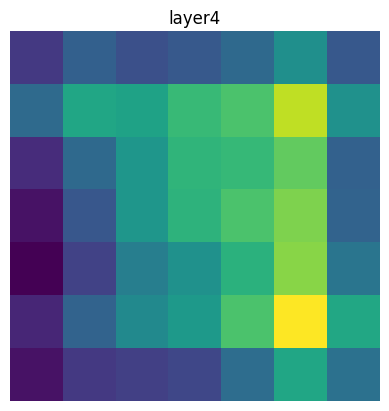

In [ ]:
for name, cam in zip(cam_extractor.target_names, cams):
  plt.imshow(cam.squeeze(0).numpy()); plt.axis('off'); plt.title(name); plt.show()

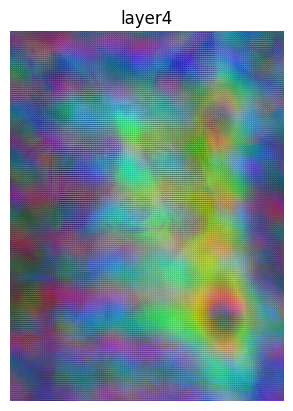

In [ ]:
for name, cam in zip(cam_extractor.target_names, cams):
  result = overlay_mask(to_pil_image(img), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.7)
  plt.imshow(result); plt.axis('off'); plt.title(name); plt.show()

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
model = resnet18(pretrained=True).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
input_tensor.shape

torch.Size([3, 224, 224])

In [ ]:
def generate_activation_heatmap(model, layer, input_image):
  """Generates an activation heatmap for a given layer.

  Args:
    model: A Pytorch model.
    layer: The layer to generate the activation heatmap for.
    input_image: A Pytorch tensor representing the input image.

  Returns:
    A Pytorch tensor representing the activation heatmap.
  """

  # Get the activations of the layer.
  activations = model.model[layer](input_image)

  # Calculate the average activation value for each channel.
  heatmap = torch.mean(activations, dim=(2, 3))

  # Normalize the heatmap.
  heatmap = heatmap.div(heatmap.max())

  # Return the heatmap.
  return heatmap


In [ ]:
for i in model.children(): print(i)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [ ]:
activation_heatmaps = []
for layer in model.modules():
  activation_heatmap = generate_activation_heatmap(model, layer, input_image)
  activation_heatmaps.append(activation_heatmap)


AttributeError: ignored

In [ ]:
layer

Linear(in_features=512, out_features=1000, bias=True)

# Feature Visualization



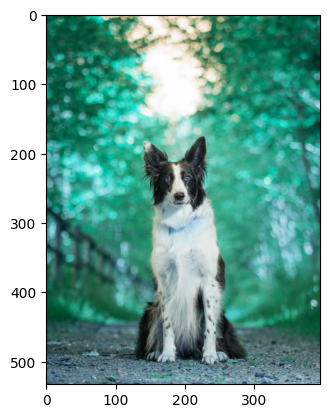

In [ ]:
plt.imshow(img.reshape(img.shape[1], img.shape[2], img.shape[0]).numpy())

In [ ]:
model = resnet18(pretrained=True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model_weights =[]
conv_layers = []

model_children = list(model.children())
counter = 0

for child in range(len(model_children)):
    if type(model_children[child]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[child].weight)
        conv_layers.append(model_children[child])
    elif type(model_children[child]) == nn.Sequential:
        for i in range(len(model_children[child])):
            for c in model_children[child][i].children():
                if type(c) == nn.Conv2d:
                    counter+=1
                    model_weights.append(c.weight)
                    conv_layers.append(c)

Total convolution layers: 17


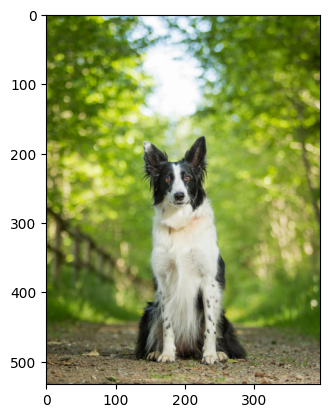

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

image = Image.open(str('/content/border-collie.jpg'))
plt.imshow(image)

image = transform(image)

In [ ]:
outputs = []
names = []
for layer in conv_layers:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([64, 112, 112])
torch.Size([64, 112, 112])
torch.Size([64, 112, 112])
torch.Size([64, 112, 112])
torch.Size([64, 112, 112])
torch.Size([128, 56, 56])
torch.Size([128, 56, 56])
torch.Size([128, 56, 56])
torch.Size([128, 56, 56])
torch.Size([256, 28, 28])
torch.Size([256, 28, 28])
torch.Size([256, 28, 28])
torch.Size([256, 28, 28])
torch.Size([512, 14, 14])
torch.Size([512, 14, 14])
torch.Size([512, 14, 14])
torch.Size([512, 14, 14])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


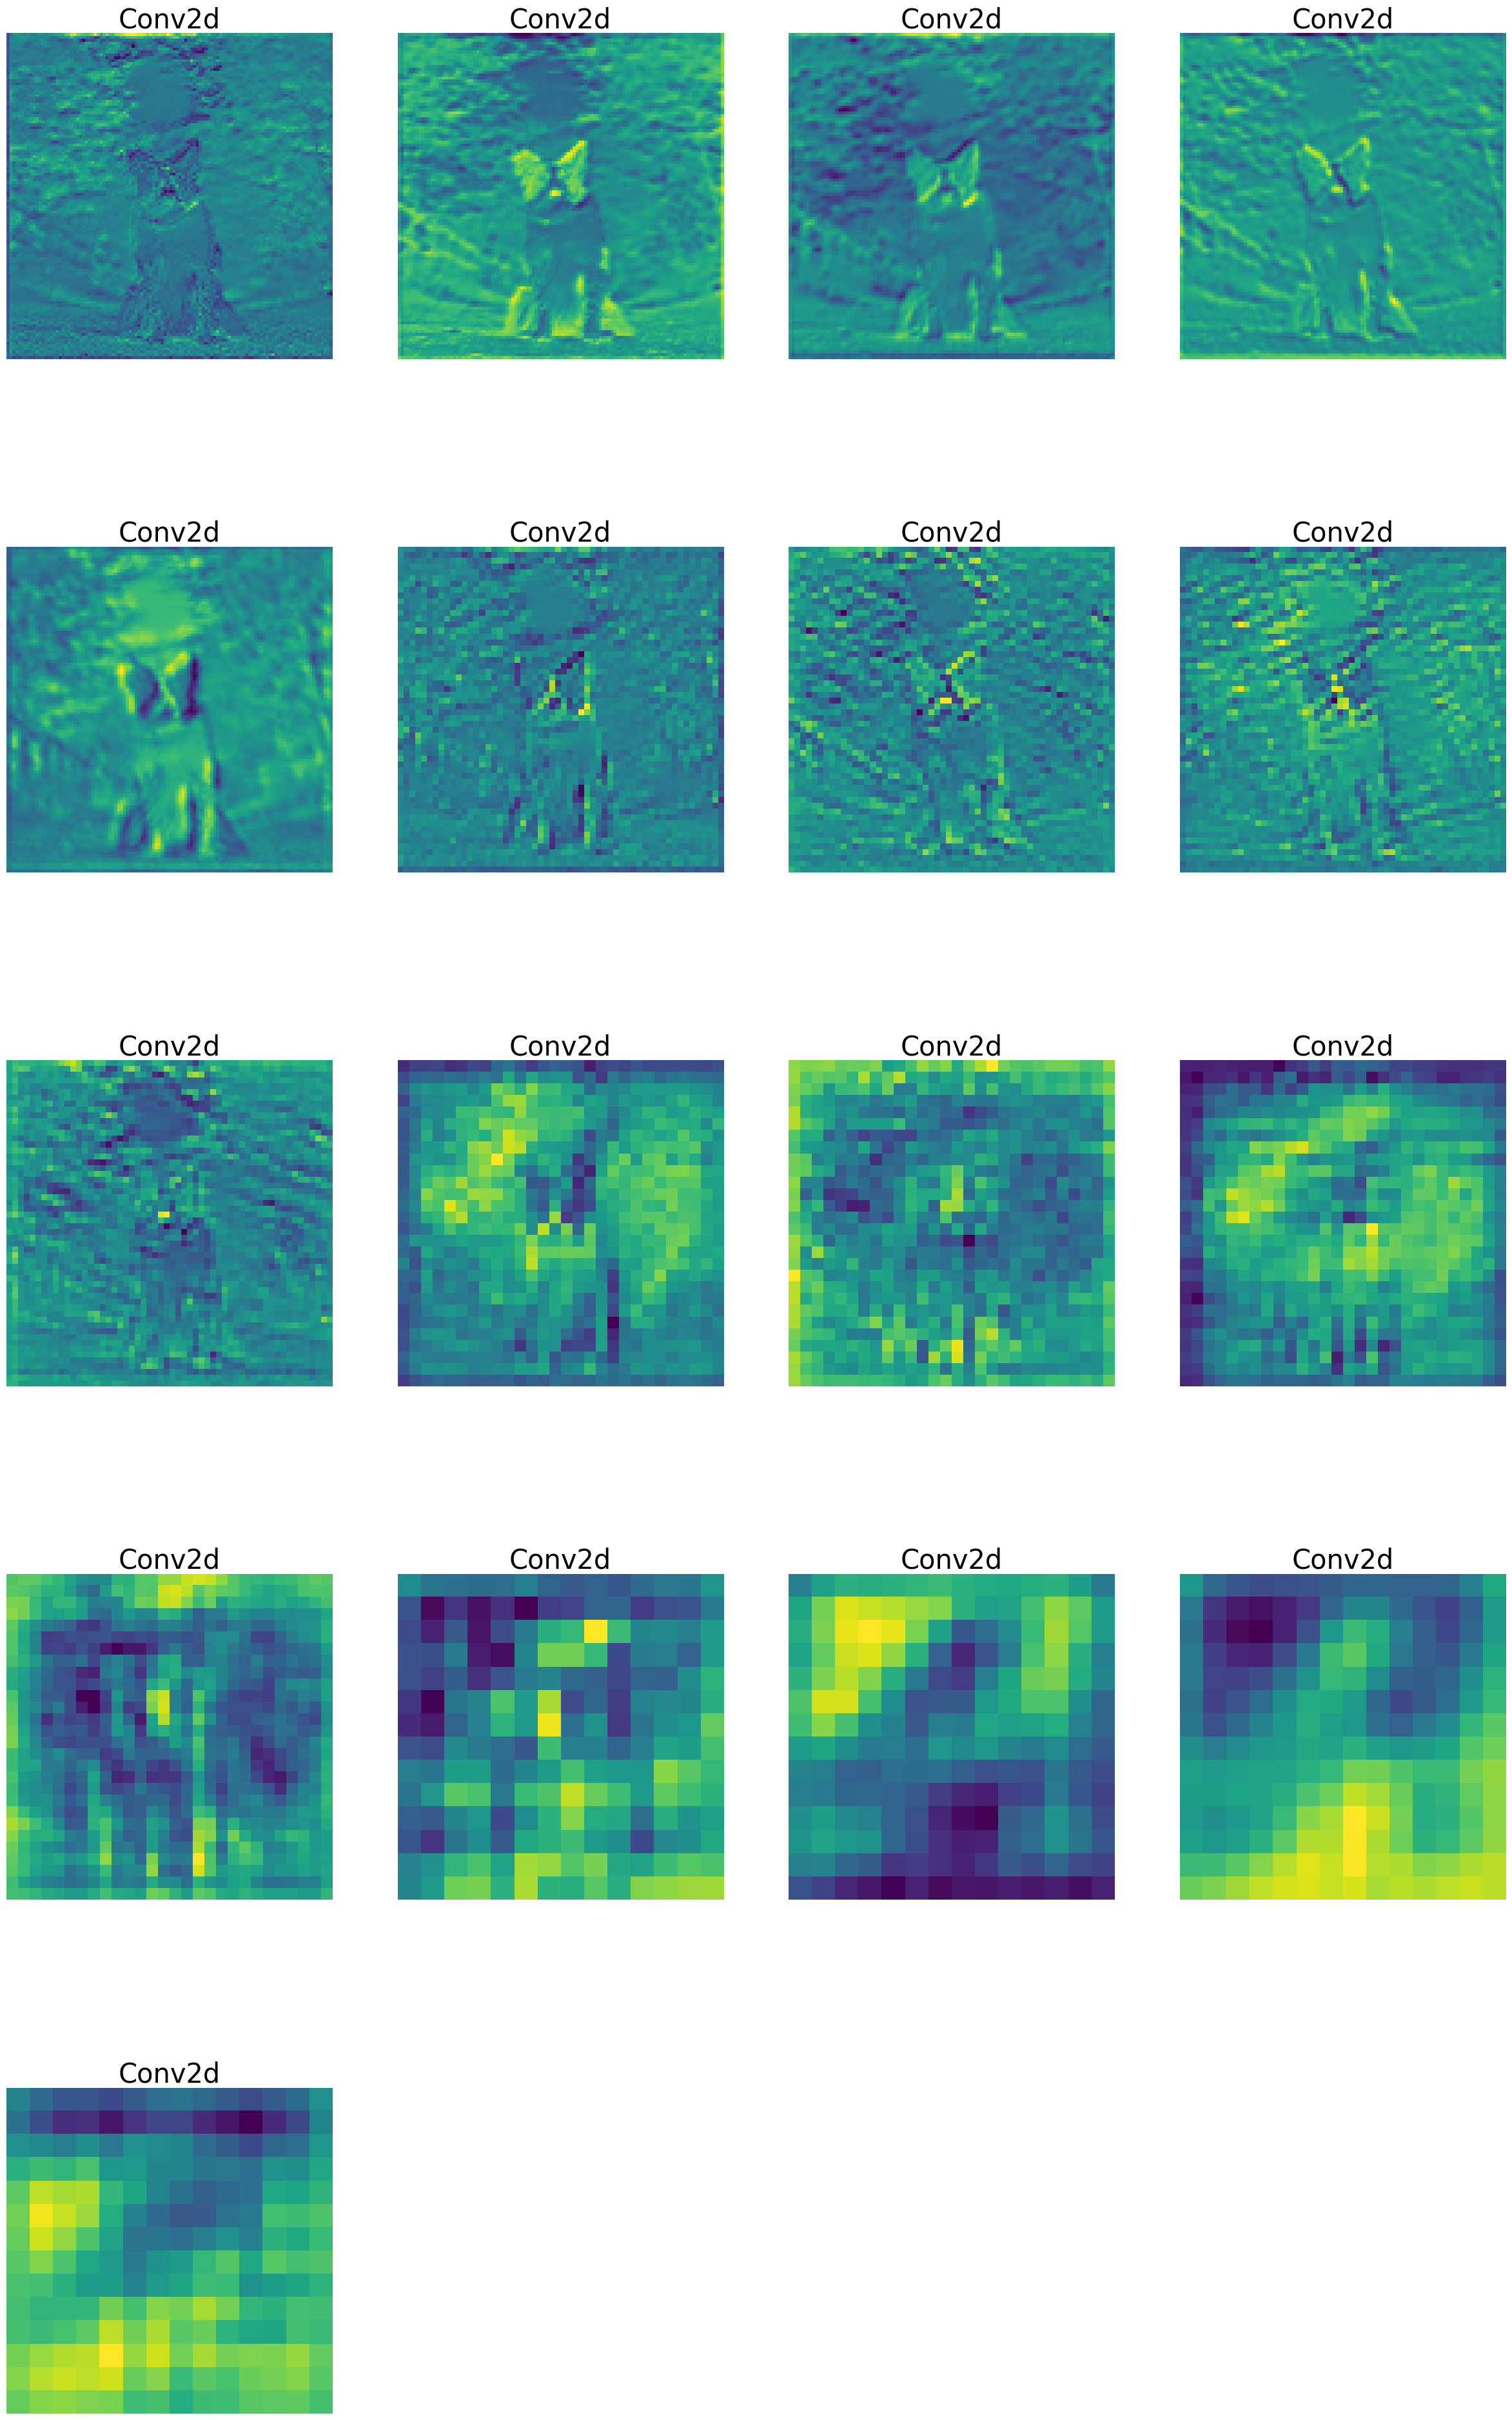

In [ ]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

# Attention Maps

In [ ]:
!git clone https://github.com/jeonsworld/ViT-pytorch.git

Cloning into 'ViT-pytorch'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 170 (delta 54), reused 53 (delta 53), pack-reused 106
Receiving objects: 100% (170/170), 21.20 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [ ]:
%cd /content/ViT-pytorch

/content/ViT-pytorch


In [ ]:
!pip install -r requirements.txt

In [ ]:
import typing
import io
import os

import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

from urllib.request import urlretrieve

from PIL import Image
from torchvision import transforms

from models.modeling import VisionTransformer, CONFIGS

In [ ]:
os.makedirs("attention_data", exist_ok=True)
if not os.path.isfile("attention_data/ilsvrc2012_wordnet_lemmas.txt"):
    urlretrieve("https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt", "attention_data/ilsvrc2012_wordnet_lemmas.txt")
if not os.path.isfile("attention_data/ViT-B_16-224.npz"):
    urlretrieve("https://storage.googleapis.com/vit_models/imagenet21k+imagenet2012/ViT-B_16-224.npz", "attention_data/ViT-B_16-224.npz")

imagenet_labels = dict(enumerate(open('attention_data/ilsvrc2012_wordnet_lemmas.txt')))

In [ ]:
# Prepare Model
config = CONFIGS["ViT-B_16"]
model = VisionTransformer(config, num_classes=1000, zero_head=False, img_size=224, vis=True)
model.load_from(np.load("attention_data/ViT-B_16-224.npz"))
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
im = Image.open("/content/border-collie.jpg")
x = transform(im)
x.size()

torch.Size([3, 224, 224])

In [ ]:
logits, att_mat = model(x.unsqueeze(0))

att_mat = torch.stack(att_mat).squeeze(1)

# Average the attention weights across all heads.
att_mat = torch.mean(att_mat, dim=1)

# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_att = torch.eye(att_mat.size(1))
aug_att_mat = att_mat + residual_att
aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

# Recursively multiply the weight matrices
joint_attentions = torch.zeros(aug_att_mat.size())
joint_attentions[0] = aug_att_mat[0]

for n in range(1, aug_att_mat.size(0)):
    joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])

# Attention from the output token to the input space.
v = joint_attentions[-1]
grid_size = int(np.sqrt(aug_att_mat.size(-1)))
mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
result = (mask * im).astype("uint8")

Prediction Label and Attention Map!

0.88571 : Border_collie
0.07694 : collie
0.01266 : papillon
0.00593 : Japanese_spaniel
0.00168 : Shetland_sheepdog, Shetland_sheep_dog, Shetland


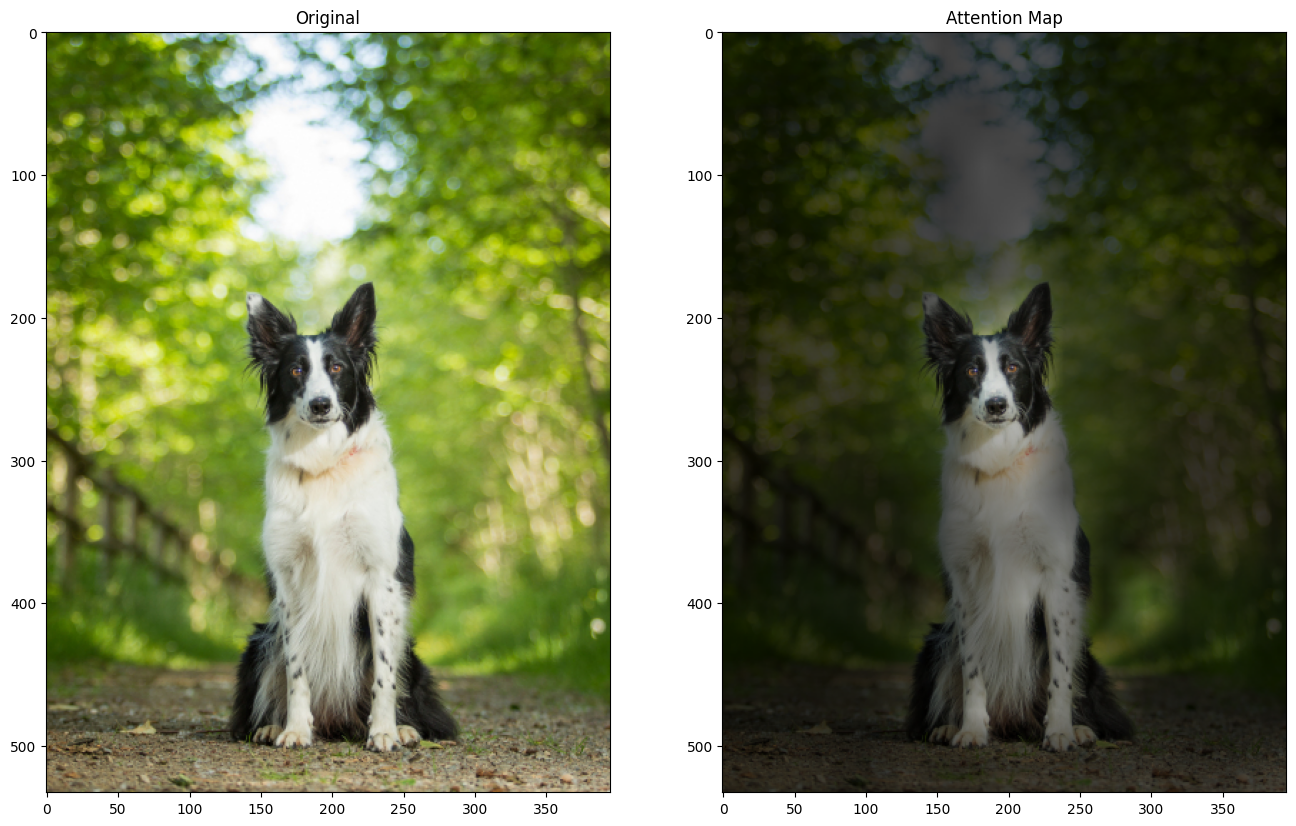

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(im)
_ = ax2.imshow(result)

probs = torch.nn.Softmax(dim=-1)(logits)
top5 = torch.argsort(probs, dim=-1, descending=True)
print("Prediction Label and Attention Map!\n")
for idx in top5[0, :5]:
    print(f'{probs[0, idx.item()]:.5f} : {imagenet_labels[idx.item()]}', end='')

In [ ]:
%cd ..

/content


# Deep Feature Factorizations


In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38244 sha256=5f3e0606f0541139f3d19a5b4d937399793456acc815c1fcbaa43f26640692d1
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [ ]:
from pytorch_grad_cam import DeepFeatureFactorization
from pytorch_grad_cam.utils.image import show_factorization_on_image


In [ ]:
from PIL import Image
import numpy as np
import requests
import cv2

import torch
from pytorch_grad_cam import DeepFeatureFactorization
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image, deprocess_image
from pytorch_grad_cam import GradCAM
from torchvision.models import resnet50

In [ ]:
def get_image_from_url(url):
    """A function that gets a URL of an image,
    and returns a numpy image and a preprocessed
    torch tensor ready to pass to the model """

    response = requests.get(url, stream=True)
    img = np.array(Image.open(response.raw))
    rgb_img_float = np.float32(img) /255

    # Normalize the image tensor
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    input_tensor = preprocess_image(rgb_img_float,
                                   mean=mean,
                                   std=std)

    return img, rgb_img_float, input_tensor

In [ ]:
def create_labels(concept_scores, top_k=2):
    """ Create a list with the image-net category names of the top scoring categories"""
    imagenet_categories_url = \
        "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt"
    labels = eval(requests.get(imagenet_categories_url).text)
    concept_categories = np.argsort(concept_scores, axis=1)[:, ::-1][:, :top_k]
    concept_labels_topk = []
    for concept_index in range(concept_categories.shape[0]):
        categories = concept_categories[concept_index, :]
        concept_labels = []
        for category in categories:
            score = concept_scores[concept_index, category]
            label = f"{labels[category].split(',')[0]}:{score:.2f}"
            concept_labels.append(label)
        concept_labels_topk.append("\n".join(concept_labels))
    return concept_labels_topk

model = resnet50(pretrained=True)
model.eval()
print("Loaded model")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 115MB/s]


Loaded model


In [ ]:
from pytorch_grad_cam.utils.image import show_factorization_on_image

def visualize_image(model, img_url, n_components=5, top_k=2):
    """Visualize a given image using Deep Feature Factorization.

    Args:
        model: A PyTorch model.
        img_url: The URL of the image to visualize.
        n_components: The number of components to factorize the deep features into.
        top_k: The number of top concepts to show.

    Returns:
        A NumPy array representing the visualized image.
    """

    img, rgb_img_float, input_tensor = get_image_from_url(img_url)
    classifier = model.fc
    dff = DeepFeatureFactorization(model=model, target_layer=model.layer4,
                                   computation_on_concepts=classifier)

    # Factorize the deep features into components.
    concepts, batch_explanations, concept_outputs = dff(input_tensor, n_components)

    # Get the softmax outputs for the top concepts.
    concept_outputs = torch.softmax(torch.from_numpy(concept_outputs), axis=-1).numpy()
    concept_label_strings = create_labels(concept_outputs, top_k=top_k)

    # Visualize the factorization on the image.
    visualization = show_factorization_on_image(rgb_img_float,
                                                batch_explanations[0],
                                                image_weight=0.3,
                                                concept_labels=concept_label_strings)

    # Resize the image if it is too large.
    result = np.hstack((img, visualization))
    if result.shape[0] > 500:
        result = cv2.resize(result, (result.shape[1]//4, result.shape[0]//4))

    return result

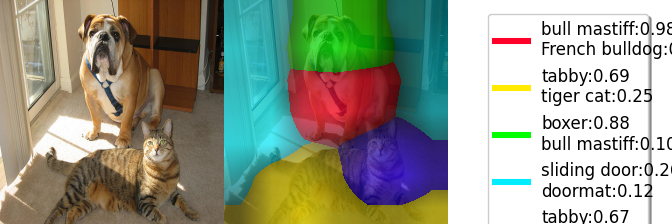

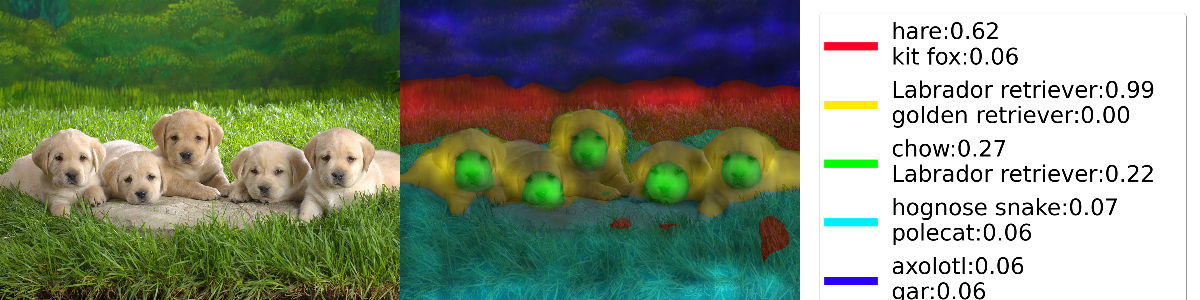

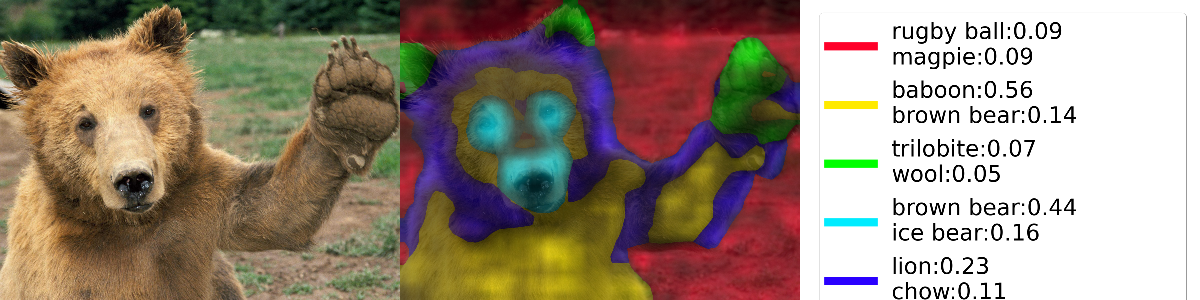

In [ ]:
display(Image.fromarray(visualize_image(model,
                                        "https://github.com/jacobgil/pytorch-grad-cam/blob/master/examples/both.png?raw=true")))
display(Image.fromarray(visualize_image(model,
                                        "https://raw.githubusercontent.com/jacobgil/pytorch-grad-cam/master/tutorials/puppies.jpg")))
display(Image.fromarray(visualize_image(model,
                                        "https://th.bing.com/th/id/R.94b33a074b9ceeb27b1c7fba0f66db74?rik=wN27mvigyFlXGg&riu=http%3a%2f%2fimages5.fanpop.com%2fimage%2fphotos%2f31400000%2fBear-Wallpaper-bears-31446777-1600-1200.jpg&ehk=oD0JPpRVTZZ6yizZtGQtnsBGK2pAap2xv3sU3A4bIMc%3d&risl=&pid=ImgRaw&r=0")))

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Create a simple Sequential model
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

model = create_model()
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate a summary of the model's architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layers_flatten (Flatten)    (None, 784)               0         
                                                                 
 layers_dense (Dense)        (None, 512)               401920    
                                                                 
 layers_dropout (Dropout)    (None, 512)               0         
                                                                 
 layers_dense_2 (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from datetime import datetime

# Set up TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])

# Run TensorBoard to visualize the logs
# Open a terminal and run: tensorboard --logdir=logs
# Open the provided URL in your browser

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0369 - accuracy: 0.9878
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0287 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0245 - accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0221 - accuracy: 0.9926


In [ ]:
%tensorboard --logdir logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-10-03 13:06:57.118186: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [ ]:
!tensorboard dev upload \
  --logdir logs \
  --name "Sample op-level graph" \
  --one_shot

2023-10-03 13:10:18.560046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 30

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your CNN model
# model = load_model('path_to_your_model.h5')

# Get the weights of the first layer (assuming it's a Conv2D layer)
layer = model.layers[0]
weights, biases = layer.get_weights()

# Normalize the weights to range [0, 1] for better visualization
weights_normalized = (weights - weights.min()) / (weights.max() - weights.min())

# Plot the weights
num_filters = weights.shape[3]  # Number of filters in the layer
for i in range(num_filters):
    plt.subplot(4, 8, i + 1)
    plt.imshow(weights_normalized[:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.show()


ValueError: ignored

In [ ]:
model.layers[0].weights

[]